In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load books dataframe
books = pd.read_csv('../data/interim/books_comics_cleaned.csv')
books.set_index('book_id', inplace=True)
books.head()

,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,
13571772,5,4.28,"['13590139', '105963', '207585', '10503130', '...",The questions plaguing Captain America's dream...,['37450'],146.0,2012.0,51,Captain America: Winter Soldier (The Ultimate ...
35452242,1,4.05,[],The fight for Jason Delgado's life and soul be...,"['16209952', '853385']",NaN,NaN,6,Bounty Hunter 4/3: My Life in Combat from Mari...
707611,6,4.06,[],These are the stories that catapulted Superman...,"['81563', '89537']",272.0,1997.0,51,"Superman Archives, Vol. 2"
27036536,9,4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"['14965', '3188368', '131836', '7507599']",224.0,2016.0,39,"War Stories, Volume 3"
11827783,26,3.16,"['6651573', '8835785', '15060759', '9466897', ...",Sir Arthur Conan Doyle's dauntless detective r...,"['61231', '4980321']",144.0,2011.0,114,Sherlock Holmes: Year One


In [4]:
display(books.describe().T)

,count,mean,std,min,25%,50%,75%,max
text_reviews_count,33925.0,38.330671,188.273209,0.0,3.00,8.00,23.00,10057.0
average_rating,33925.0,3.915122,0.414071,0.0,3.67,3.97,4.22,5.0
num_pages,25461.0,173.125918,165.769958,0.0,100.00,160.00,204.00,8124.0
publication_year,27521.0,2009.722903,25.023938,13.0,2008.00,2012.00,2015.00,2997.0
ratings_count,33925.0,796.750273,5095.773964,0.0,25.00,82.00,319.00,406669.0


In [5]:
# What % of num_pages are non-null?
books.num_pages.count()/len(books.num_pages)

# It's likely the num_pages isn't too significant, but will fill with median to see if should stay
books['num_pages'].fillna(books['num_pages'].median(), inplace=True)

# Fix data type
books['num_pages']= books['num_pages'].astype(int)

In [6]:
# Why is there a 2997 year & a 13?
display(books[books['publication_year']==2997])
display(books[books['publication_year']==13])

,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,
1740329,5,4.25,"['106069', '22374', '96358', '95406', '107032'...",This masterpiece of modern comics storytelling...,"['15085', '12740', '29578']",160,2997.0,33,Batman: The Dark Knight Returns


,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,
18279387,28,2.11,[],Manga,"['3979033', '6643355']",156,13.0,56,One is Enough


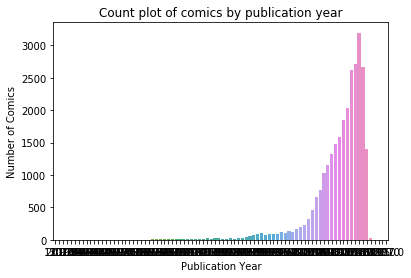

In [7]:
# Examine spread of publication years visually
sns.countplot(x='publication_year', data=books)
plt.title("Count plot of comics by publication year")
plt.ylabel("Number of Comics")
plt.xlabel('Publication Year')
plt.savefig('../figures/publication_years1.png')

In [8]:
# Filter for anything before 1950 or later than 2020
year_mask = (books.publication_year < 1950) | (books.publication_year > 2020)
outliers = books[year_mask]

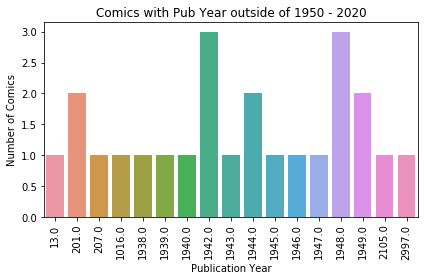

In [9]:
# Let's see where these are
sns.countplot(x='publication_year', data=outliers)
plt.xticks(rotation=90)
plt.title("Comics with Pub Year outside of 1950 - 2020")
plt.ylabel("Number of Comics")
plt.xlabel("Publication Year")
plt.tight_layout()

plt.savefig('../figures/publication_year2.png')

I'm going to assume 2997 is a typo and meant to be 1997 - a quick Google search shows there is indeed a 1997 comic by this name.

The 2105 is most likely meant to be 2015.

For the years in the 30s and 40s, that seems appropriate. There would have been comics available then.

The other early ones will replace with the median.

In [10]:
# Confirm 2105 hunch and replace
display(books[books['publication_year']==2105])

,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,
26514764,3,3.82,[],Based on the true story of the world's most fa...,"['14339651', '452017', '14339652']",160,2105.0,22,Executive Outcomes


In [11]:
# Google search confirms that hunch - fix it
books['publication_year'].replace(2105, 2015, inplace=True)

In [12]:
# Fix 2997 year
books['publication_year'].replace(2997, 1997, inplace=True)

# Replace the very early years with NaN
books['publication_year'].replace([13,201, 207, 1016], np.nan)

book_id
13571772    2012.0
35452242       NaN
707611      1997.0
27036536    2016.0
11827783    2011.0
             ...  
32598998    2016.0
3106983     2008.0
10644600    2011.0
28928706    2016.0
23363286    2014.0
Name: publication_year, Length: 33925, dtype: float64

In [13]:
# Replace missing values with median year
books['publication_year'].fillna(books['publication_year'].median(), inplace=True)

# Fix numeric data type
books['publication_year'] = books['publication_year'].astype(int)

In [14]:
display(books.describe().T)

,count,mean,std,min,25%,50%,75%,max
text_reviews_count,33925.0,38.330671,188.273209,0.0,3.00,8.00,23.00,10057.0
average_rating,33925.0,3.915122,0.414071,0.0,3.67,3.97,4.22,5.0
num_pages,33925.0,169.851113,143.721228,0.0,128.00,160.00,192.00,8124.0
publication_year,33925.0,2010.120619,21.904644,13.0,2009.00,2012.00,2014.00,2020.0
ratings_count,33925.0,796.750273,5095.773964,0.0,25.00,82.00,319.00,406669.0


In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 13571772 to 23363286
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  33925 non-null  int64  
 1   average_rating      33925 non-null  float64
 2   similar_books       33925 non-null  object 
 3   description         30460 non-null  object 
 4   authors             33925 non-null  object 
 5   num_pages           33925 non-null  int32  
 6   publication_year    33925 non-null  int32  
 7   ratings_count       33925 non-null  int64  
 8   title               33925 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 3.6+ MB


Ratings_count of 400k+ seems pretty extreme when there are around 550k total ratings. Unless it's the most popular of all the comics. 

Let's see...

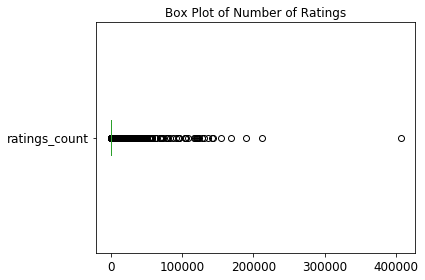

In [16]:
books[['ratings_count']].boxplot(grid=False, vert=False, fontsize=12)
plt.xticks(range(0, 500000,100000))
plt.title("Box Plot of Number of Ratings")
plt.tight_layout()
plt.savefig('../figures/ratings_count.png')

In [17]:
display(books[books['ratings_count']==406669.0])

,text_reviews_count,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,,
472331,10057,4.35,"['25104', '209968', '156530', '21330', '102958...",This Hugo Award-winning graphic novel chronicl...,"['3961', '13285', '106526']",416,2005,406669,Watchmen


This was an award-winning graphic novel that was reprinted in 2005. It is possible that a huge % of comic reviwers would have rated this one, being that it is such a classic. I will leave that value in and see how the modelling looks both with/without it.

# Visual EDA
These three columns in particular it will be interesting to look at the spread:
* number of reviews
* number of ratings
* average rating
* count of similar books

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33925 entries, 13571772 to 23363286
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  33925 non-null  int64  
 1   average_rating      33925 non-null  float64
 2   similar_books       33925 non-null  object 
 3   description         30460 non-null  object 
 4   authors             33925 non-null  object 
 5   num_pages           33925 non-null  int32  
 6   publication_year    33925 non-null  int32  
 7   ratings_count       33925 non-null  int64  
 8   title               33925 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 3.6+ MB


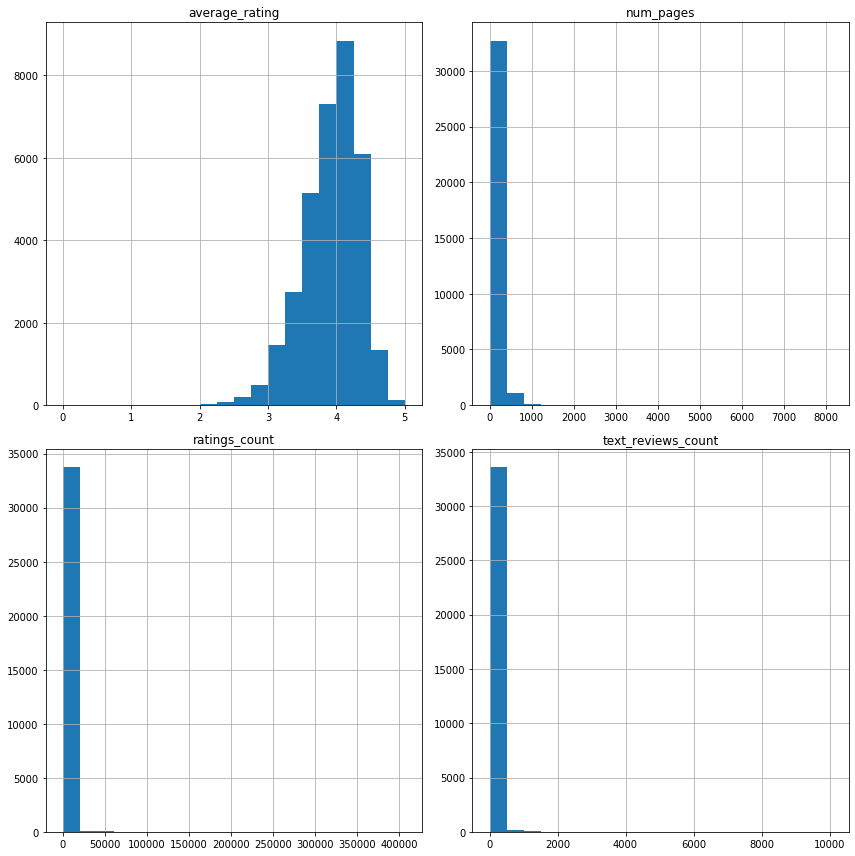

In [19]:
# explore numeric columns visually - leave out
num_cols = ['text_reviews_count', 'average_rating', 'num_pages',
            'ratings_count']
books[num_cols].hist(bins=20, layout=(2,2), figsize=(12,12))
plt.tight_layout()

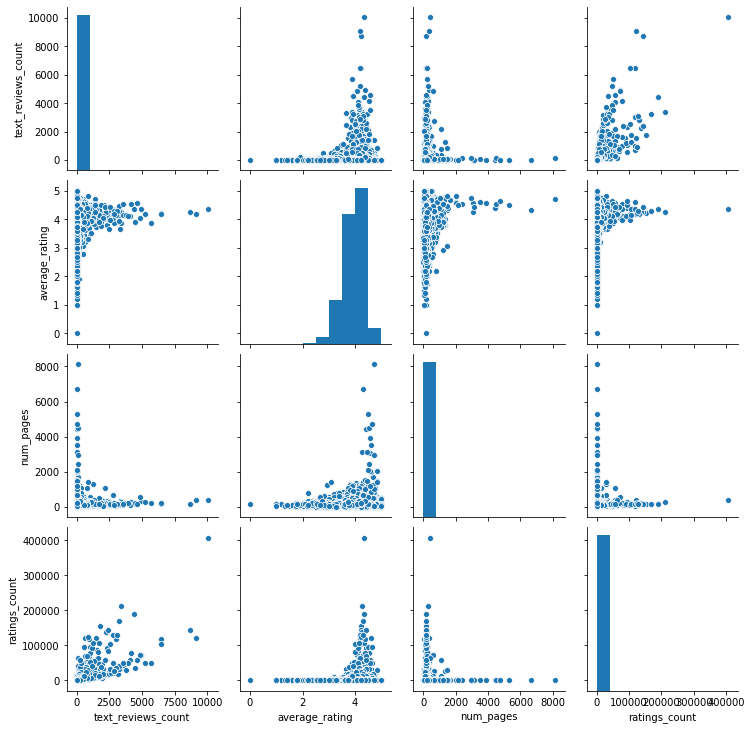

In [20]:
sns.pairplot(books[num_cols])

,text_reviews_count,average_rating,num_pages,ratings_count
text_reviews_count,1.000000,0.062531,0.038346,0.757712
average_rating,0.062531,1.000000,0.135278,0.095271
num_pages,0.038346,0.135278,1.000000,0.030909
ratings_count,0.757712,0.095271,0.030909,1.000000


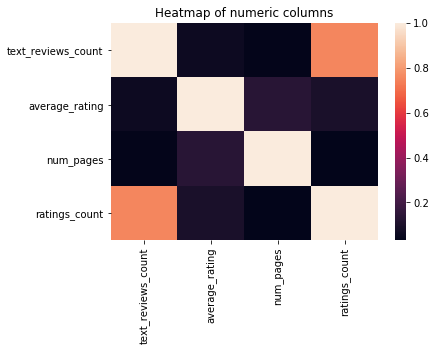

In [21]:
display(books[num_cols].corr())
sns.heatmap(books[num_cols].corr())
plt.title('Heatmap of numeric columns')
plt.savefig('../figures/heatmap.png')

Will drop the text_reviews_count.

In [22]:
books.drop('text_reviews_count', axis=1, inplace=True)
books.head()

,average_rating,similar_books,description,authors,num_pages,publication_year,ratings_count,title
book_id,,,,,,,,
13571772,4.28,"['13590139', '105963', '207585', '10503130', '...",The questions plaguing Captain America's dream...,['37450'],146,2012,51,Captain America: Winter Soldier (The Ultimate ...
35452242,4.05,[],The fight for Jason Delgado's life and soul be...,"['16209952', '853385']",160,2012,6,Bounty Hunter 4/3: My Life in Combat from Mari...
707611,4.06,[],These are the stories that catapulted Superman...,"['81563', '89537']",272,1997,51,"Superman Archives, Vol. 2"
27036536,4.15,[],PRODUCT DESCRIPTION: The first new volume of G...,"['14965', '3188368', '131836', '7507599']",224,2016,39,"War Stories, Volume 3"
11827783,3.16,"['6651573', '8835785', '15060759', '9466897', ...",Sir Arthur Conan Doyle's dauntless detective r...,"['61231', '4980321']",144,2011,114,Sherlock Holmes: Year One


In [23]:
# Create step 3 output
books.to_csv('../data/interim/books_step3_output.csv')

# Review Data

Most of the EDA to be done was on the set of books. But now I'll examine the reviews to see what, if anything, should be done here.

After that I'll join the two sets on book_id so we have a tidy set of data that would be ready for modeling.

In [24]:
# Load and check reviews data
reviews = pd.read_csv('../data/interim/reviews_comics_cleaned.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    542338 non-null  object
 1   user_id      542338 non-null  object
 2   book_id      542338 non-null  int64 
 3   rating       542338 non-null  int64 
 4   review_text  542015 non-null  object
dtypes: int64(2), object(3)
memory usage: 20.7+ MB


In [25]:
reviews.head()

,review_id,user_id,book_id,rating,review_text
0,66b2ba840f9bd36d6d27f46136fe4772,dc3763cdb9b2cae805882878eebb6a32,18471619,3,Sherlock Holmes and the Vampires of London \n ...
1,72f1229aba5a88f9e72f0dcdc007dd22,bafc2d50014200cda7cb2b6acd60cd73,6315584,4,"I've never really liked Spider-Man. I am, howe..."
2,a75309355f8662caaa5e2c92ab693d3f,bafc2d50014200cda7cb2b6acd60cd73,29847729,4,"A very quick introduction, this is coming out ..."
3,c3cc5a3e1d6b6c9cf1c044f306c8e752,bafc2d50014200cda7cb2b6acd60cd73,18454118,5,I've been waiting so long for this. I first st...
4,cc444be37ab0a42bfb4dd818cb5edd10,bafc2d50014200cda7cb2b6acd60cd73,2239435,4,The only thing more entertaining than this boo...


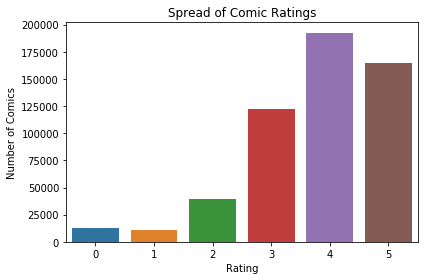

In [26]:
sns.countplot(reviews.rating)
plt.title('Spread of Comic Ratings')
plt.xlabel('Rating')
plt.ylabel("Number of Comics")
plt.tight_layout()

plt.savefig('../figures/ratings.png')

In [27]:
# get an idea of the percentages for ratings
ser = reviews.rating.value_counts().sort_index()
ser

values = reviews.rating.value_counts().sort_index().index
values

print([x for x in values])
print([round(ser[x]/len(reviews.rating),2) for x in range(6)])

[0, 1, 2, 3, 4, 5]
[0.02, 0.02, 0.07, 0.22, 0.35, 0.3]


# Text Features

Just like with my books dataframe, I'll do some NLP feature extraction in the next step. For now this dataframe is good to go.

In [28]:
reviews.to_csv('../data/interim/reviews_step3_output.csv')